In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
df =pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X=df.iloc[:,0:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(7,activation='relu',input_dim=7))

In [ ]:
model.add(Dense(7,activation='relu'))

In [ ]:
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [ ]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 39ms/step - loss: 0.9211 - val_loss: 0.9534
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8295 - val_loss: 0.8569
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.7430 - val_loss: 0.7716
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6682 - val_loss: 0.6941
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5993 - val_loss: 0.6225
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5360 - val_loss: 0.5537
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4753 - val_loss: 0.4847
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4097 - val_loss: 0.4084
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.3354 - val_loss: 0.3178
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2452 - val_loss: 0.2136
Epoch 11/100
8/8 [=======

In [ ]:
y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 8ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7395988172305761

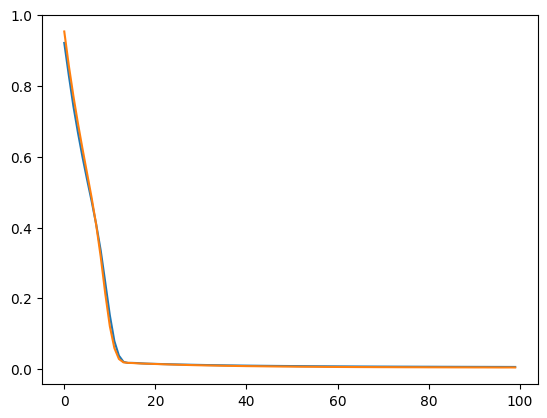

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])